<a href="https://colab.research.google.com/github/Memohacker/Data_Science_CodeSoft_Intern_Tasks/blob/main/Task1_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Titanic**

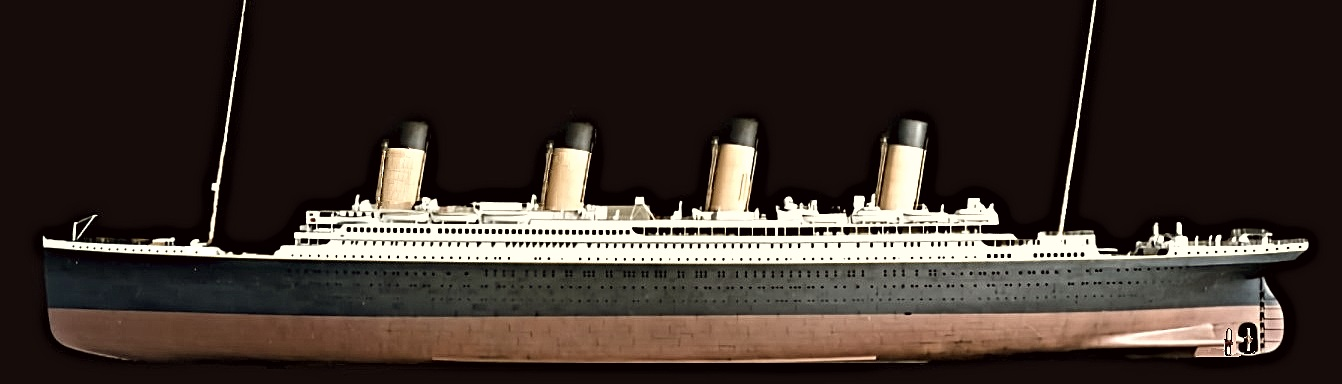

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the Titanic dataset

In [16]:
titanic_data = pd.read_csv('tested.csv')


In [17]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing


In [4]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


# Handling missing values


In [5]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


# Define categorical and numerical features


In [6]:
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Preprocessing pipeline


In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


# Model Training pipeline


In [8]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


# Split the data


In [9]:

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model


In [10]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Data visualization


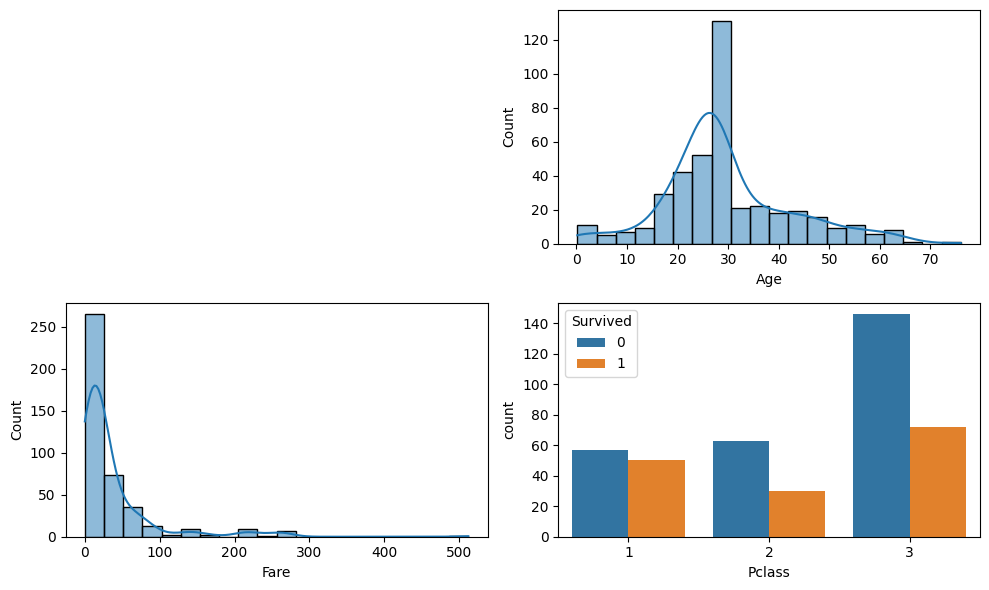

In [11]:
plt.figure(figsize=(10, 6))

# Age distribution of passengers
plt.subplot(2, 2, 2)
sns.histplot(data=titanic_data, x='Age', bins=20, kde=True)
# Fare distribution of passengers
plt.subplot(2, 2, 3)
sns.histplot(data=titanic_data, x='Fare', bins=20, kde=True)

# Passenger class distribution
plt.subplot(2, 2, 4)
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')

plt.tight_layout()
plt.show()



# Evaluate the model


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)
print(f"Accuracy: {accuracy*100}%" )


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]
Accuracy: 100.0%
